In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 

LOAD DATASET

In [3]:
df1= pd.read_csv(r"train.csv",delimiter=";")
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df2= pd.read_csv(r"test.csv",delimiter=";")
df = pd.concat([df1,df2], axis = 0, ignore_index= True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
df.info()   # having object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [6]:
df.isnull().sum()  #no null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

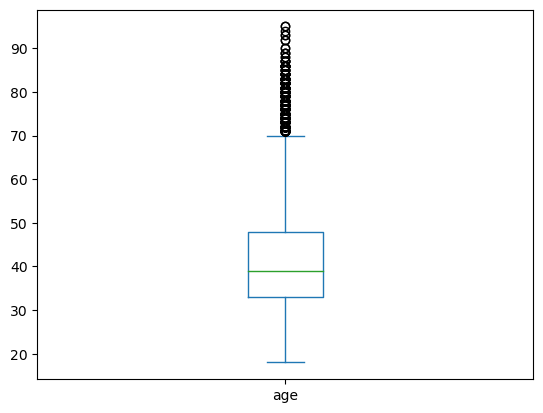

In [7]:
# AGE
df['age'].plot(kind = 'box')    #Outliers present

In [8]:
#JOB
df['job'].value_counts()

blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64

In [9]:
df = pd.get_dummies(df, columns = ['job'])
df

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,married,secondary,no,-333,yes,no,cellular,30,jul,...,0,0,0,0,0,1,0,0,0,0
49728,57,married,tertiary,yes,-3313,yes,yes,unknown,9,may,...,0,0,0,0,1,0,0,0,0,0
49729,57,married,secondary,no,295,no,no,cellular,19,aug,...,0,0,0,0,0,0,0,1,0,0
49730,28,married,secondary,no,1137,no,no,cellular,6,feb,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#MARITAL
df['marital'].value_counts()

married     30011
single      13986
divorced     5735
Name: marital, dtype: int64

In [11]:
df = pd.get_dummies(df, columns = ['marital'])
df

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,yes,no,unknown,5,may,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,yes,no,unknown,5,may,151,...,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,yes,yes,unknown,5,may,76,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,yes,no,unknown,5,may,92,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,no,no,unknown,5,may,198,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,secondary,no,-333,yes,no,cellular,30,jul,329,...,0,0,1,0,0,0,0,0,1,0
49728,57,tertiary,yes,-3313,yes,yes,unknown,9,may,153,...,0,1,0,0,0,0,0,0,1,0
49729,57,secondary,no,295,no,no,cellular,19,aug,151,...,0,0,0,0,1,0,0,0,1,0
49730,28,secondary,no,1137,no,no,cellular,6,feb,129,...,0,0,0,0,0,0,0,0,1,0


In [12]:
#EDUCATION
df['education'].value_counts()

secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64

In [13]:
df['education'].value_counts().to_dict()

{'secondary': 25508, 'tertiary': 14651, 'primary': 7529, 'unknown': 2044}

In [14]:
df['education'] = df['education'].replace({'secondary': 2, 'tertiary': 3, 'primary': 1, 'unknown': 0})
df

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,3,no,2143,yes,no,unknown,5,may,261,...,0,0,0,0,0,0,0,0,1,0
1,44,2,no,29,yes,no,unknown,5,may,151,...,0,0,0,0,1,0,0,0,0,1
2,33,2,no,2,yes,yes,unknown,5,may,76,...,0,0,0,0,0,0,0,0,1,0
3,47,0,no,1506,yes,no,unknown,5,may,92,...,0,0,0,0,0,0,0,0,1,0
4,33,0,no,1,no,no,unknown,5,may,198,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,2,no,-333,yes,no,cellular,30,jul,329,...,0,0,1,0,0,0,0,0,1,0
49728,57,3,yes,-3313,yes,yes,unknown,9,may,153,...,0,1,0,0,0,0,0,0,1,0
49729,57,2,no,295,no,no,cellular,19,aug,151,...,0,0,0,0,1,0,0,0,1,0
49730,28,2,no,1137,no,no,cellular,6,feb,129,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#DEFAULT
df['default'].value_counts()

no     48841
yes      891
Name: default, dtype: int64

In [16]:
df['default'].replace({'no': 0, 'yes': 1}, inplace=True)
df

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,3,0,2143,yes,no,unknown,5,may,261,...,0,0,0,0,0,0,0,0,1,0
1,44,2,0,29,yes,no,unknown,5,may,151,...,0,0,0,0,1,0,0,0,0,1
2,33,2,0,2,yes,yes,unknown,5,may,76,...,0,0,0,0,0,0,0,0,1,0
3,47,0,0,1506,yes,no,unknown,5,may,92,...,0,0,0,0,0,0,0,0,1,0
4,33,0,0,1,no,no,unknown,5,may,198,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,2,0,-333,yes,no,cellular,30,jul,329,...,0,0,1,0,0,0,0,0,1,0
49728,57,3,1,-3313,yes,yes,unknown,9,may,153,...,0,1,0,0,0,0,0,0,1,0
49729,57,2,0,295,no,no,cellular,19,aug,151,...,0,0,0,0,1,0,0,0,1,0
49730,28,2,0,1137,no,no,cellular,6,feb,129,...,0,0,0,0,0,0,0,0,1,0


<Axes: >

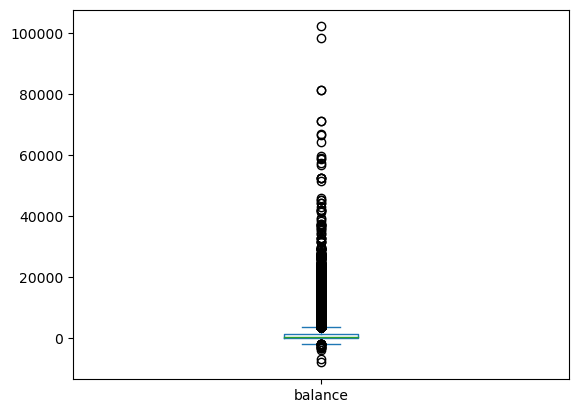

In [17]:
#BALANCE
df['balance'].plot(kind = "box")

In [18]:
df['balance'].mean()

1367.7615619721707

In [19]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [20]:
#housing
df['housing'].value_counts()

yes    27689
no     22043
Name: housing, dtype: int64

In [21]:
df['housing'].replace({'yes': 0, 'no': 1}, inplace=True)
df

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,3,0,2143,0,no,unknown,5,may,261,...,0,0,0,0,0,0,0,0,1,0
1,44,2,0,29,0,no,unknown,5,may,151,...,0,0,0,0,1,0,0,0,0,1
2,33,2,0,2,0,yes,unknown,5,may,76,...,0,0,0,0,0,0,0,0,1,0
3,47,0,0,1506,0,no,unknown,5,may,92,...,0,0,0,0,0,0,0,0,1,0
4,33,0,0,1,1,no,unknown,5,may,198,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,2,0,-333,0,no,cellular,30,jul,329,...,0,0,1,0,0,0,0,0,1,0
49728,57,3,1,-3313,0,yes,unknown,9,may,153,...,0,1,0,0,0,0,0,0,1,0
49729,57,2,0,295,1,no,cellular,19,aug,151,...,0,0,0,0,1,0,0,0,1,0
49730,28,2,0,1137,1,no,cellular,6,feb,129,...,0,0,0,0,0,0,0,0,1,0


In [22]:
df['loan'].value_counts()

no     41797
yes     7935
Name: loan, dtype: int64

In [23]:
df['loan'].replace({'yes': 1, 'no': 0}, inplace=True)
df

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,3,0,2143,0,0,unknown,5,may,261,...,0,0,0,0,0,0,0,0,1,0
1,44,2,0,29,0,0,unknown,5,may,151,...,0,0,0,0,1,0,0,0,0,1
2,33,2,0,2,0,1,unknown,5,may,76,...,0,0,0,0,0,0,0,0,1,0
3,47,0,0,1506,0,0,unknown,5,may,92,...,0,0,0,0,0,0,0,0,1,0
4,33,0,0,1,1,0,unknown,5,may,198,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,2,0,-333,0,0,cellular,30,jul,329,...,0,0,1,0,0,0,0,0,1,0
49728,57,3,1,-3313,0,1,unknown,9,may,153,...,0,1,0,0,0,0,0,0,1,0
49729,57,2,0,295,1,0,cellular,19,aug,151,...,0,0,0,0,1,0,0,0,1,0
49730,28,2,0,1137,1,0,cellular,6,feb,129,...,0,0,0,0,0,0,0,0,1,0


In [24]:
#contact
df['contact'].value_counts()

cellular     32181
unknown      14344
telephone     3207
Name: contact, dtype: int64

In [25]:
df['contact'].replace({'unknown':0, 'cellular':0,'telephone':1}, inplace = True)
df

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,3,0,2143,0,0,0,5,may,261,...,0,0,0,0,0,0,0,0,1,0
1,44,2,0,29,0,0,0,5,may,151,...,0,0,0,0,1,0,0,0,0,1
2,33,2,0,2,0,1,0,5,may,76,...,0,0,0,0,0,0,0,0,1,0
3,47,0,0,1506,0,0,0,5,may,92,...,0,0,0,0,0,0,0,0,1,0
4,33,0,0,1,1,0,0,5,may,198,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,2,0,-333,0,0,0,30,jul,329,...,0,0,1,0,0,0,0,0,1,0
49728,57,3,1,-3313,0,1,0,9,may,153,...,0,1,0,0,0,0,0,0,1,0
49729,57,2,0,295,1,0,0,19,aug,151,...,0,0,0,0,1,0,0,0,1,0
49730,28,2,0,1137,1,0,0,6,feb,129,...,0,0,0,0,0,0,0,0,1,0


In [26]:
#DAY
df['day'].isna().sum()

0

In [27]:
#MONTH
df['month'].value_counts()

may    15164
jul     7601
aug     6880
jun     5872
nov     4359
apr     3225
feb     2871
jan     1551
oct      818
sep      631
mar      526
dec      234
Name: month, dtype: int64

In [28]:
df = pd.get_dummies(df, columns = ['month'], drop_first=True)
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

<Axes: >

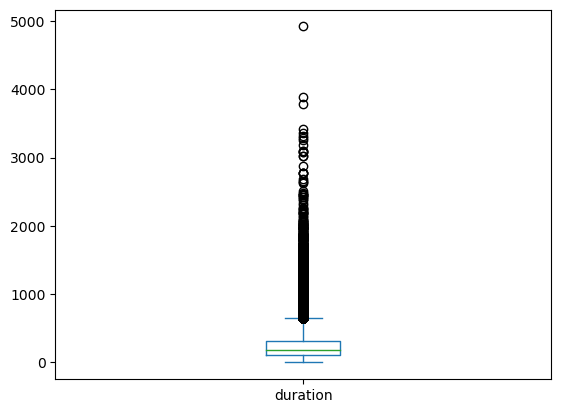

In [29]:
#DURATION
df['duration'].plot(kind = 'box')

<Axes: >

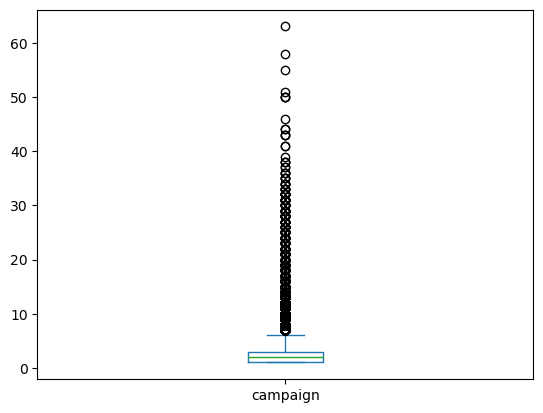

In [30]:
#CAMPAIGN
df['campaign'].plot(kind = 'box')

In [31]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

<Axes: >

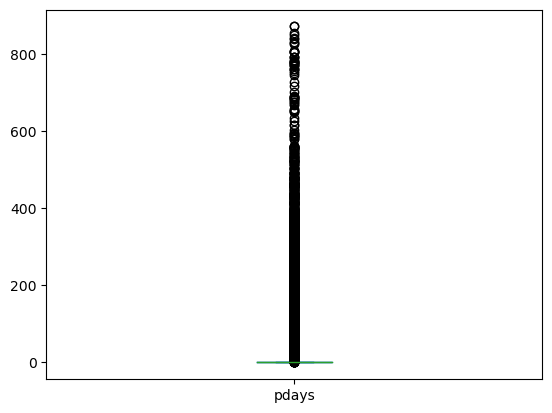

In [32]:
#pdays
df['pdays'].plot(kind = 'box')

In [33]:
df['previous'].value_counts()

0      40659
1       3058
2       2299
3       1255
4        792
5        506
6        302
7        227
8        147
9        102
10        71
11        68
12        49
13        39
14        21
15        21
17        16
16        13
19        12
20         9
23         9
18         7
22         7
24         6
25         5
27         5
21         4
29         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [34]:
# unknown value is hug so we will drop it
df.drop('poutcome',axis = 1, inplace=True)

In [35]:
df['y'].value_counts()

no     43922
yes     5810
Name: y, dtype: int64

In [36]:
df['y'].replace({'no': 0, 'yes': 1}, inplace = True)
df

,age,education,default,balance,housing,loan,contact,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,2143,0,0,0,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,2,0,29,0,0,0,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,2,0,2,0,1,0,5,76,1,...,0,0,0,0,0,0,1,0,0,0
3,47,0,0,1506,0,0,0,5,92,1,...,0,0,0,0,0,0,1,0,0,0
4,33,0,0,1,1,0,0,5,198,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,2,0,-333,0,0,0,30,329,5,...,0,0,0,1,0,0,0,0,0,0
49728,57,3,1,-3313,0,1,0,9,153,1,...,0,0,0,0,0,0,1,0,0,0
49729,57,2,0,295,1,0,0,19,151,11,...,0,0,0,0,0,0,0,0,0,0
49730,28,2,0,1137,1,0,0,6,129,4,...,0,1,0,0,0,0,0,0,0,0


MODEL TRAINING

In [37]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split

x = df.drop('y', axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.25, random_state=22)

In [39]:
# Problem is of Classification
# 1. LR 
# 2. DT 
# 3. RF 
# 4. KNN
# 5. ADA

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [41]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score, classification_report, confusion_matrix, multilabel_confusion_matrix

def evaluation(act, pred):
    accuracy = accuracy_score(act, pred)*100
    f1 = f1_score(act, pred)*100
    re = recall_score(act, pred)*100
    pre = precision_score(act, pred)*100
    print(classification_report(act, pred))
    return f'accuracy is: {accuracy}, f1 score is: {f1}, Recall is: {re}, Precision is: {pre} '


evaluation(y_test, lr_y_pred)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10933
           1       0.58      0.18      0.28      1500

    accuracy                           0.89     12433
   macro avg       0.74      0.58      0.61     12433
weighted avg       0.86      0.89      0.86     12433



c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'accuracy is: 88.57073916190782, f1 score is: 28.05063291139241, Recall is: 18.46666666666667, Precision is: 58.31578947368421 '

In [42]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()

param = { 'criterion': ['gini', 'entropy'],
         'max_depth':  np.arange(2,50),
         'min_samples_split': np.arange(2,10) , 
         'min_samples_leaf' : np.arange(1,6)
}

dt_rscv = RandomizedSearchCV(dt, param_distributions=param, cv = 5, random_state=22 )
dt_rscv.fit(X_train,y_train)
dt_rscv.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 8,
 'criterion': 'entropy'}

In [43]:
dt = DecisionTreeClassifier(min_samples_split= 6,
                            min_samples_leaf= 3,
                            max_depth= 8,
                            criterion = 'entropy')
dt.fit(X_train,y_train)
dt_y_pred = dt.predict(X_test)

evaluation(y_test, dt_y_pred)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10933
           1       0.60      0.37      0.46      1500

    accuracy                           0.89     12433
   macro avg       0.76      0.67      0.70     12433
weighted avg       0.88      0.89      0.88     12433



'accuracy is: 89.47961071342395, f1 score is: 46.21710526315789, Recall is: 37.46666666666666, Precision is: 60.30042918454935 '

In [44]:
# RandomForestClassifier
rf = RandomForestClassifier()
param = { 'n_estimators' : np.arange(1,100,5),
        'criterion' : ['gini', 'entropy', 'log_loss'] ,
        'max_depth': np.arange(2,10),
        'min_samples_split': np.arange(2,10),
        'min_samples_leaf': np.arange(1,6)}

rf_rscv = RandomizedSearchCV(rf, param_distributions=param, cv = 5, random_state=22)
rf_rscv.fit(X_train , y_train)
rf_rscv.best_params_

{'n_estimators': 31,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 9,
 'criterion': 'gini'}

In [45]:
rf = RandomForestClassifier( n_estimators = 31,
                            min_samples_split =  4,
                            min_samples_leaf =  1,
                            max_depth =  9,
                            criterion = 'gini')
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

evaluation(y_test, rf_y_pred)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10933
           1       0.69      0.13      0.22      1500

    accuracy                           0.89     12433
   macro avg       0.79      0.56      0.58     12433
weighted avg       0.87      0.89      0.85     12433



'accuracy is: 88.81203249416875, f1 score is: 22.247065399664613, Recall is: 13.266666666666666, Precision is: 68.85813148788927 '

In [46]:
#AdaBoostClassifier
ada = AdaBoostClassifier()
param = { 'n_estimators' : np.arange(1,101,5),
            'learning_rate' : np.linspace(0.001,0.5, 10)
}

ada_rscv = RandomizedSearchCV(ada, param_distributions=param, cv= 5, random_state=22)
ada_rscv.fit(X_train, y_train)
ada_rscv.best_params_

{'n_estimators': 86, 'learning_rate': 0.3891111111111111}

In [47]:
ada = AdaBoostClassifier( n_estimators= 86, learning_rate= 0.389 )
ada.fit(X_train,y_train)
ada_y_pred = ada.predict(X_test)

evaluation(y_test, ada_y_pred)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10933
           1       0.61      0.27      0.37      1500

    accuracy                           0.89     12433
   macro avg       0.76      0.62      0.66     12433
weighted avg       0.87      0.89      0.87     12433



'accuracy is: 89.09354138180649, f1 score is: 37.33826247689464, Recall is: 26.93333333333333, Precision is: 60.8433734939759 '

In [49]:
svm = SVC()
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)

evaluation(y_test, svm_y_pred)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     10933
           1       0.53      0.01      0.01      1500

    accuracy                           0.88     12433
   macro avg       0.71      0.50      0.47     12433
weighted avg       0.84      0.88      0.82     12433



'accuracy is: 87.94337649802944, f1 score is: 1.056105610561056, Recall is: 0.5333333333333333, Precision is: 53.333333333333336 '

In [50]:
# DecisionTreeClassifier GIVES BEST ACCURACY . WE WILL CONTINUE USING DecisionTreeClassifier.

In [57]:
import pickle
import json
with open('model.pkl','wb') as f:
    pickle.dump(dt,f)

In [59]:
json_data = { 'education' : {'secondary': 2, 'tertiary': 3, 'primary': 1, 'unknown': 0},
             'default' : {'no': 0, 'yes': 1},
             'housing' : {'yes': 0, 'no': 1},
             'loan' : {'yes': 1, 'no': 0},
             'contact' : {'unknown':0, 'cellular':0,'telephone':1},
             'columns' : list(x.columns)            
}

with open('jason_data.json','w')as f:
    json.dump(json_data,f)

In [133]:
age = 32
job = 'management'
marital = 'married'
education = 'tertiary'
default = 'yes'
balance = 2536
housing = 'yes'
loan = 'yes'
contact = 'cellular'
day = 26
month = 'aug'
duration  = 958
campaign = 6
pdays = -1
previous = 0
poutcome = 'success'

test = np.zeros(len(x.columns), dtype = int)
test[0] = age
test[json_data['columns'].index('job_'+ job)] = 1
test[json_data['columns'].index('marital_'+ marital)] = 1
test[1] = json_data['education'][education]
test[2] = json_data['default'][default]
test[3] = balance
test[4] = json_data['housing'][housing]
test[5] = json_data['loan'][loan]
test[6] = json_data['contact'][contact]
test[7] = day
test[json_data['columns'].index('month_'+ month)] = 1
test[9] = duration
test[10] = campaign
test[11] = pdays
test[12] = previous

print(test)
#prediction on test array:

if dt.predict([test])[0] == 0:
    print('no')
else:
    print('yes')


[  32    3    1 2536    0    1    0   26    0  958    6   -1    0    0
    0    0    1    0    0    0    0    0    0    0    0    1    0    1
    0    0    0    0    0    0    0    0    0    0]
no


c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
